**Loading data**

In [53]:
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# Files path
train_path = '/content/train.jsonl'
test_path = '/content/test.jsonl'
valid_path = '/content/valid.jsonl'

In [3]:
# Load and inspect the structure of the ERE dataset
def load_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            data.append(json.loads(line))
    return data

In [30]:
# Load the data
train_data = load_data(train_path)
test_data = load_data(test_path)
valid_data = load_data(valid_path)

**Data Analysis**

In [44]:
print(f"Number of sentences in train data: {len(train_data)}")
print(f"Number of sentences in test data: {len(test_data)}")
print(f"Number of sentences in valid data: {len(valid_data)}")

Number of sentences in train data: 2913
Number of sentences in test data: 857
Number of sentences in valid data: 710


In [36]:
# Define function to extract and count event types from the dataset
def extract_event_types(data):
    event_type_counts = Counter()
    for item in data:
        for event in item.get('events', []):
            event_type = event['type']
            event_type_counts[event_type] += 1
    return event_type_counts

In [37]:
# Extract event types and count occurrences in both datasets
train_event_counts = extract_event_types(train_data)
valid_event_counts = extract_event_types(valid_data)

In [40]:
# Display the event counts
train_event_counts_df = pd.DataFrame(train_event_counts.items(), columns=['Event Type', 'Count'])
valid_event_counts_df = pd.DataFrame(valid_event_counts.items(), columns=['Event Type', 'Count'])

In [41]:
train_event_counts_df

,Event Type,Count
0,Control,876
1,Achieve,273
2,Creating,902
3,Self_motion,1132
4,Motion,2029
...,...,...
163,Filling,92
164,Renting,10
165,Expend_resource,89
166,Lighting,22


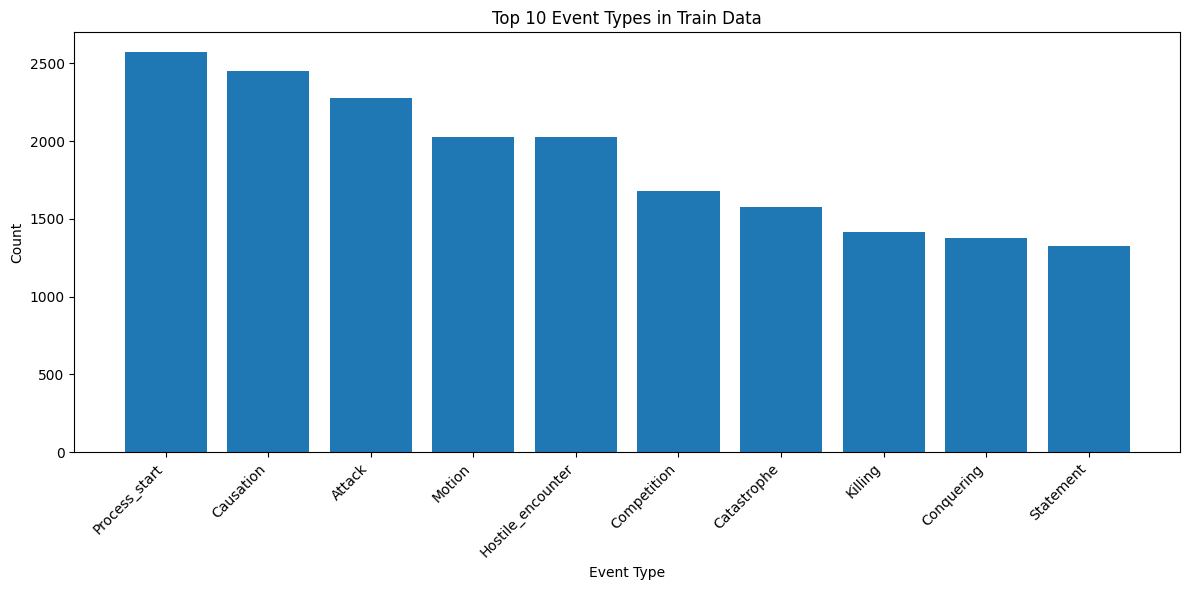

In [56]:
# Sort the event counts in descending order and select the top 10
top_10_train_events = train_event_counts_df.sort_values('Count', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_train_events['Event Type'], top_10_train_events['Count'])
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Top 10 Event Types in Train Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [42]:
valid_event_counts_df

,Event Type,Count
0,Hindering,61
1,Cause_change_of_position_on_a_scale,232
2,Statement,307
3,Achieve,68
4,Giving,126
...,...,...
163,Emergency,1
164,Adducing,18
165,Incident,1
166,Prison,12


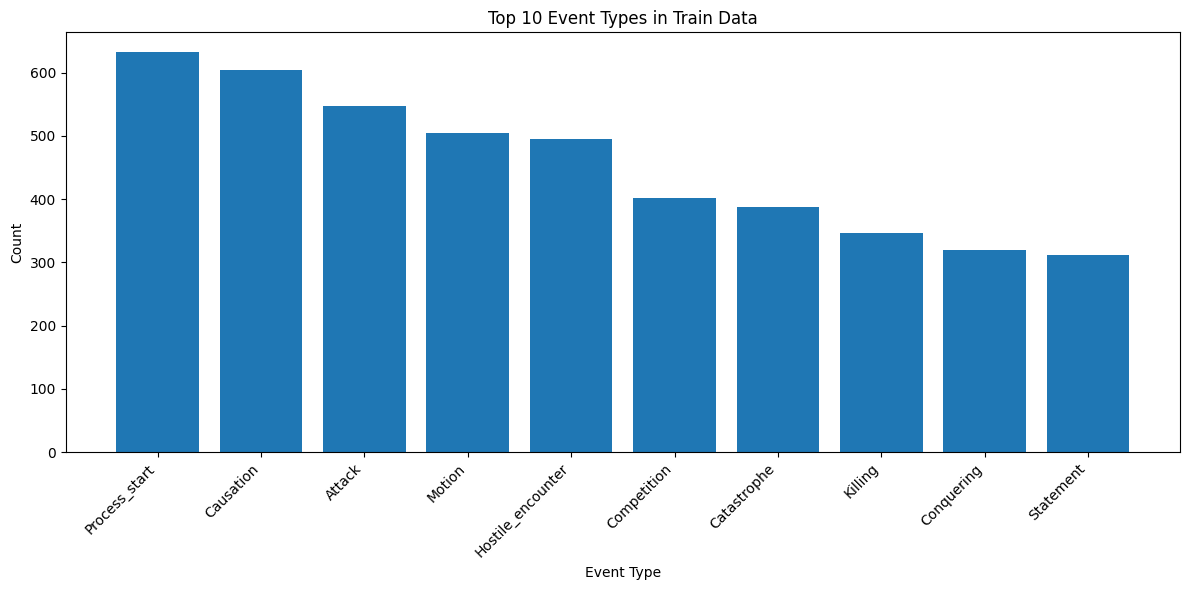

In [57]:
# Sort the event counts in descending order and select the top 10
top_10_valid_events = valid_event_counts_df.sort_values('Count', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_train_events['Event Type'], top_10_valid_events['Count'])
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Top 10 Event Types in Train Data')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()